### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 08-Mar-25    

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [258]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-03-09 15:16:48


In [259]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [260]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: to clean the data
import re

# preprocessing: stop words removal
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import WordNetLemmatizer

# model running
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [261]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [262]:
dummy_dataframe = pd.read_csv("dataset/news_Feb_14.csv")
dummy_dataframe = dummy_dataframe.iloc[:, 0]  # Select only the headline column
documents = dummy_dataframe.tolist()  # Convert to list
documents

['ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank',
 'Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO',
 'India, US agree to resolve trade and tariff rows after Trump-Modi talks',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief',
 'HBL, S&P Global launch Pakistan’s first manufacturing PMI',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains',
 'PPL executes agreements for Sui Gas Field operations',
 'Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan',
 'Rupee records marginal improvement against US dollar',
 'At least 9 dead, 7 injured in Balochistan’s Harnai blast',
 'Gold adds to record rally, reaches Rs306,200 per tola in Pakistan',
 'IMF’s 2024 Article IV report, and debate on inflation—I',
 'Pakistan CPI 2024 – deep-rooted corruption persists',
 '‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network',
 'Reforming 

In [263]:
original_headlines = documents.copy()

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase

In [264]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-03-09 15:16:48


['ecc endorses purchase of $582mn capital shares in brics’s new development bank',
 'netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo',
 'india, us agree to resolve trade and tariff rows after trump-modi talks',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief',
 'hbl, s&p global launch pakistan’s first manufacturing pmi',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistan’s harnai blast',
 'gold adds to record rally, reaches rs306,200 per tola in pakistan',
 'imf’s 2024 article iv report, and debate on inflation—i',
 'pakistan cpi 2024 – deep-rooted corruption persists',
 '‘like a wormhole’: musk promises ‘dubai loop’ tunnel network',
 'reforming 

## Data Cleaning
here we clean the data

In [265]:
import re
import unicodedata

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text)  # Normalize Unicode text
    
    # Separate numbers attached to words
    text = re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', text)  # number-word
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', text)  # word-number
    
    text = text.replace("-", " ") # replace hyphens with spaces to tokenize the numbers and words
    text = re.sub(r'[^\w\s,]', '', text)  # Remove everything except words, numbers, and commas
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    
    return text

In [266]:
documents = [clean_text(text) for text in documents]
documents

['ecc endorses purchase of 582 mn capital shares in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible, provocative fo',
 'india, us agree to resolve trade and tariff rows after trump modi talks',
 'aurangzeb discusses pakistans structural reforms with ifc chief',
 'hbl, sp global launch pakistans first manufacturing pmi',
 'kse 100 closes 479 points lower as late session selling erases intra day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistans harnai blast',
 'gold adds to record rally, reaches rs 306,200 per tola in pakistan',
 'imfs 2024 article iv report, and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promises dubai loop tunnel network',
 'reforming pension funds i

## Stop Words Removal
here we remove stop words. we have three options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. 
```
sw = ["from","of","and", "on","for", "the","have","a","be","to","in","will","if","by","into","as"]
docs_list = []
for d in document: 
    d_nlp = nlp(d.lower())
    t_list = []
    for token in d_nlp:
        tok_lem = str(token.lemma_)
        if (tok_lem not in sw):
            t_list.append(tok_lem)
    str_ = ' '.join(t_list) 
    docs_list.append(str_)
docs_list
```
However this is not a good practice. 
- pulling stop words from ```ntlk``` library: 
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
However after running this code it didnt not remove stop words thus i removed it
- intializing stop_words in ```CountVectorizer()``` however here we are not using it
- using the ```ENGLISH_STOP_WORDS``` in ```sklearn```
```
tokens = [word for word in tokens if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS]  
```
Lets try it and see it how it goes.

In [267]:
# Tokenize each document
tokenized_docs = [word_tokenize(doc) for doc in documents] 

# Remove stop words
filtered_docs = [[word for word in doc if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS] for doc in tokenized_docs]

# Convert back to sentences if needed
documents = [" ".join(doc) for doc in filtered_docs]

documents

['ecc endorses purchase 582 mn capital shares bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff rows trump modi talks',
 'aurangzeb discusses pakistans structural reforms ifc chief',
 'hbl , sp global launch pakistans manufacturing pmi',
 'kse 100 closes 479 points lower late session selling erases intra day gains',
 'ppl executes agreements sui gas field operations',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee records marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold adds record rally , reaches rs 306,200 tola pakistan',
 'imfs 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promises dubai loop tunnel network',
 'reforming pension funds pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judges',
 '

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

here we perform lemmatization as in the previous assignment, lemmatization had worked much better

### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. after our 48 trials in the previous assignment, lemmatization was much better.

In [268]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [269]:
documents = [lemmatize_doc(doc) for doc in documents]
documents

['ecc endorses purchase 582 mn capital share bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff row trump modi talk',
 'aurangzeb discusses pakistan structural reform ifc chief',
 'hbl , sp global launch pakistan manufacturing pmi',
 'kse 100 close 479 point lower late session selling erases intra day gain',
 'ppl executes agreement sui gas field operation',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee record marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold add record rally , reach r 306,200 tola pakistan',
 'imf 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promise dubai loop tunnel network',
 'reforming pension fund pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judge',
 'solar panel import 8

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

for this assignment, we will focus on unigrams.

In [270]:
# because we want unigrams, we DO NOT have to do anything and we will leave it the way it is

# Vectorization
here we convert the text to numerical format for the model to understand it. we have four ways to do it:
- word2Vec
- doc2vec

in this code we are exploring the first method

## Word2Vec
in word2vec we have two methods:
- cbow architecture (target is predicted by context)
- skipgram (target predicts context)

In [271]:
# for sg variable
sg = 0 # CBOW
# sg = 1 # Skip-Gram

if sg == 0:
    model_type = 'CBOW'
else:
    model_type = 'Skipgram'

print(f"sg={sg}, model={model_type}")

sg=0, model=CBOW


### Variables to set
here we set variables like vector_size, window_size, count of epochs etc. we define them here so that in the code we dont have to change them. We can easily change them here and the code will change accordingly.

one thing to note here is that before starting the assignment i will make a list of each variable and what i want to test. then i will iterate over each variable keeping rest fixed, and write a loop to iterate over that variable and then i will select that as best. then for the next i will use its list but that previous one will be in its best. this will help me run as many things as i want in one code run.

In [272]:
vector_sizes = [50, 100, 150, 200, 250, 300]
selected_vector_size = 200

In [273]:
windows = [8, 9, 10, 11, 12]
selected_window = windows[0]

In [274]:
epochs = [50, 100, 150, 200, 250]
selected_epoch = epochs[0]

### Code declaration
here we declare our code using the following syntax

In [275]:
def get_avg_word2vec(tokens, model, vector_size=300):
    vectors = [model.wv[word] for word in tokens if word in model.wv]  
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size) 

In [276]:
def run_word2vec (docs, vector_size, window_size, epoch):
    word2vec_model = Word2Vec(
        sentences=docs,                        # Tokenized text
        vector_size=vector_size,           # Each word is represented by a x-dimensional vector
        window=window_size,                     # Context window size
        min_count=1,                                # Ignores words that appear less than 'min_count' times
        workers=4,                                  # Number of CPU cores used
        sg=sg,                   
        epochs=epoch                       # Number of training iterations
    )
    # print(word2vec_model)
    
    # Convert the list to a Pandas Series
    documents_series = pd.Series(docs)

    docs = documents_series.apply(lambda x: get_avg_word2vec(x, word2vec_model))    
    docs = np.array(docs.tolist())
    
    # print(docs)
    
    return docs

# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [277]:
def display_k_means(k, data):
    print(f"Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [278]:
def run_k_means(k, data, results, vector_size, window, epoch):
    print(f"Executing {k} start time:", get_current_datetime())
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: Silhouette Score and WSS={silhouette_avg:.4f}\t{wss:.4f}")
    
    results.append([k, f'Word2Vec', vector_size, window, epoch, model_type, silhouette_avg, wss])
    
    # Create a DataFrame to store headlines with their assigned clusters
    df_clusters = pd.DataFrame({'Headline': original_headlines, 'Cluster': labels})

    # Display sample headlines per cluster
    for cluster in range(k):
        print(f"\nCluster {cluster}:")
        sample_headlines = df_clusters[df_clusters["Cluster"] == cluster].sample(n=min(5, len(df_clusters[df_clusters["Cluster"] == cluster])), random_state=erp)
        for idx, row in sample_headlines.iterrows():
            print(f"- {row['Headline']}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")
    
    return silhouette_avg, wss

## Code Running
here we run the code in a for-loop, because we have many variables we need to test with k-means. thus we test them here.

In [279]:
copy_of_docs = documents

In [280]:
# window = selected_window
epoch = selected_epoch
vector_size = selected_vector_size
# the variable that is commented means that is the variable being tested

In [281]:
# define a output that will save each case WSS and silhoutee so that it can be saved into a csv file later on
results = []

In [282]:
# define an output that will save each WSS with its k so that we can plot a scree plot later on
wss_scores = []

In [283]:
# define a variable that will save the best combination for reference at the end
best_combination = []
best_WSS = 100000000000000000000000000 # we want lowest wss so we start with large value
best_Sil = 0    # we want max sil so we start with small value

In [284]:
def run_combinations(k, best_combination, best_Sil, best_WSS):
    sum_wss = 0
    count_wss = 0

    for window in windows:
        print("Executed at:", get_current_datetime(), "\n")
        documents = run_word2vec(copy_of_docs, vector_size, window, epoch)
        print(f"sg={sg}, Vector_Size={vector_size}, Window={window}, Epoch={epoch}")
        print("Finished displaying at:", get_current_datetime(), "\n")
        sil, wss = run_k_means(k, documents, results, vector_size, window, epoch)
        
        # sum the wss to find average for elbow plot
        sum_wss += wss
        count_wss += 1
        
        # compute max(sil, best_sil) and min(wss, best_wss) to find the BEST
        if sil > best_Sil and wss < best_WSS:
            best_combination = [k, vector_size, window, epoch, sil, wss]
            best_WSS = wss
            best_Sil = sil
        else:
            # if best not found, pick if WSS is best however SIL is not best but it should be within 0.1 range
            sil_diff = sil - best_Sil
            wss_diff = best_WSS - wss
            if sil_diff > 0 and sil_diff < 0.1 and wss_diff > 0:
                best_combination = [k, vector_size, window, epoch, sil, wss]
                best_WSS = wss
                best_Sil = sil

    # once all combinations are tested, compute average and append that for elbow plots for that k
    avg_wss = sum_wss / count_wss
    wss_scores.append([k, avg_wss])
    
    return best_combination, best_Sil, best_WSS

2025-03-09 15:16:50,468 : INFO : collecting all words and their counts
2025-03-09 15:16:50,469 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.


2025-03-09 15:16:50,470 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:16:50,474 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:16:50,476 : INFO : Creating a fresh vocabulary
2025-03-09 15:16:50,477 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:16:50.477505', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:16:50,478 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of original 24723, drops 0)', 'datetime': '2025-03-09T15:16:50.477505', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'pr

Executed at: 2025-03-09 15:16:50 



2025-03-09 15:16:50,657 : INFO : EPOCH 16: training on 24723 raw words (4750 effective words) took 0.0s, 1116098 effective words/s
2025-03-09 15:16:50,667 : INFO : EPOCH 17: training on 24723 raw words (4645 effective words) took 0.0s, 2607061 effective words/s
2025-03-09 15:16:50,675 : INFO : EPOCH 18: training on 24723 raw words (4718 effective words) took 0.0s, 1031302 effective words/s
2025-03-09 15:16:50,684 : INFO : EPOCH 19: training on 24723 raw words (4646 effective words) took 0.0s, 914837 effective words/s
2025-03-09 15:16:50,693 : INFO : EPOCH 20: training on 24723 raw words (4706 effective words) took 0.0s, 1671758 effective words/s
2025-03-09 15:16:50,703 : INFO : EPOCH 21: training on 24723 raw words (4620 effective words) took 0.0s, 753744 effective words/s
2025-03-09 15:16:50,711 : INFO : EPOCH 22: training on 24723 raw words (4700 effective words) took 0.0s, 2183305 effective words/s
2025-03-09 15:16:50,719 : INFO : EPOCH 23: training on 24723 raw words (4694 effectiv

sg=0, Vector_Size=200, Window=8, Epoch=50
Finished displaying at: 2025-03-09 15:16:50 

Executing 5 start time: 2025-03-09 15:16:50
K=5: Silhouette Score and WSS=0.2590	4.4530

Cluster 0:
- Workshop stresses for shaping equitable, sustainable food systems
- Pakistan prioritizes circular economy to boost sustainability, waste management: Romina
- DeepSeek dilemma: Why is the Chinese AI app facing global backlash?
- PTI backed military courts after APS attack, says Justice Hilali
- IGP pays tributes to police martyrs of Faisal Chowk Mall Road tragedy

Cluster 1:
- Solar panel imports: 80 companies transferred around Rs106bn abroad: FBR
- Bank Alfalah strengthens Qist Bazaar with Rs55m equity and Rs460m credit facility to fuel its expansion
- DS Polo storm into Deepal 96 Punjab Cup final
- FPSC issues latest public notice regarding CSS Exams 2025
- Pakistan CPI 2024 – deep-rooted corruption persists

Cluster 2:
- Canada vs Sweden 4-3: Marner’s OT winner lifts Canada in thriller
- Page Wor

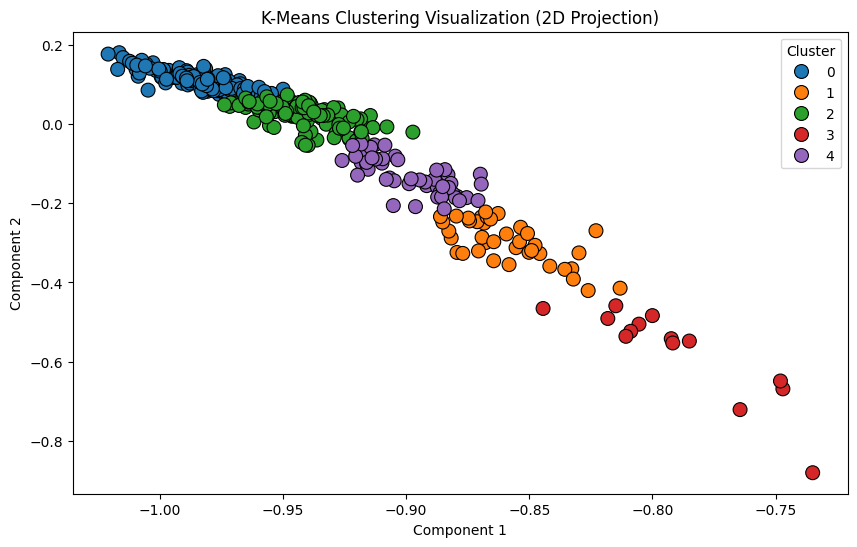

2025-03-09 15:16:51,240 : INFO : collecting all words and their counts
2025-03-09 15:16:51,241 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:16:51,242 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:16:51,247 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:16:51,249 : INFO : Creating a fresh vocabulary
2025-03-09 15:16:51,250 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:16:51.250931', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:16:51,251 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:16:51 

Finished executing at: 2025-03-09 15:16:51 

Executed at: 2025-03-09 15:16:51 



2025-03-09 15:16:51,443 : INFO : EPOCH 8: training on 24723 raw words (4747 effective words) took 0.0s, 342079 effective words/s
2025-03-09 15:16:51,467 : INFO : EPOCH 9: training on 24723 raw words (4699 effective words) took 0.0s, 386781 effective words/s
2025-03-09 15:16:51,494 : INFO : EPOCH 10: training on 24723 raw words (4673 effective words) took 0.0s, 297265 effective words/s
2025-03-09 15:16:51,518 : INFO : EPOCH 11: training on 24723 raw words (4716 effective words) took 0.0s, 326426 effective words/s
2025-03-09 15:16:51,548 : INFO : EPOCH 12: training on 24723 raw words (4654 effective words) took 0.0s, 257564 effective words/s
2025-03-09 15:16:51,574 : INFO : EPOCH 13: training on 24723 raw words (4611 effective words) took 0.0s, 293795 effective words/s
2025-03-09 15:16:51,598 : INFO : EPOCH 14: training on 24723 raw words (4579 effective words) took 0.0s, 324248 effective words/s
2025-03-09 15:16:51,620 : INFO : EPOCH 15: training on 24723 raw words (4720 effective words

sg=0, Vector_Size=200, Window=9, Epoch=50
Finished displaying at: 2025-03-09 15:16:52 

Executing 5 start time: 2025-03-09 15:16:52
K=5: Silhouette Score and WSS=0.2104	5.1561

Cluster 0:
- SBP grants FPT clearance to Zia Ijaz as Askari Bank President & CEO
- Aurangzeb highlights increasing risks facing insurance industry
- Ahmed Ali Akbar and Maham Batool Kickstart Their Wedding with a Qawwali Night
- Drake addresses rap beef with Joe Budden and Kendrick Lamar on new song 'Gimme a Hug'
- Bureaucrats will also have to declare their assets

Cluster 1:
- India expects $200 million missile deal with Philippines this year, sources say
- Petrol Price in Pakistan to ‘go down’ from Feb 16 amid dip in global oil rates
- MoITT sets up 43 software tech parks
- Pakistan Foreign Policy Challenges: Post US Presidential Election 2024
- Islamabad’s Zones 2, 4, and 5: CDA forms joint body to oversee projects

Cluster 2:
- Stocks remain range-bound, KSE-100 closes 361 points lower
- BISE Rawalpindi 10t

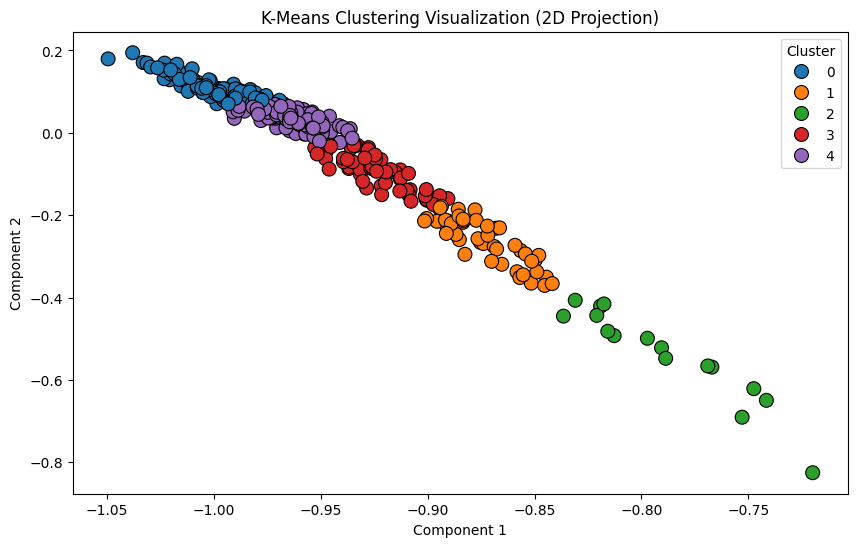

2025-03-09 15:16:52,667 : INFO : collecting all words and their counts
2025-03-09 15:16:52,668 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:16:52,669 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:16:52,675 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:16:52,677 : INFO : Creating a fresh vocabulary
2025-03-09 15:16:52,679 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:16:52.679390', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:16:52,680 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:16:52 

Finished executing at: 2025-03-09 15:16:52 

Executed at: 2025-03-09 15:16:52 



2025-03-09 15:16:52,856 : INFO : EPOCH 8: training on 24723 raw words (4675 effective words) took 0.0s, 622056 effective words/s
2025-03-09 15:16:52,874 : INFO : EPOCH 9: training on 24723 raw words (4685 effective words) took 0.0s, 784087 effective words/s
2025-03-09 15:16:52,888 : INFO : EPOCH 10: training on 24723 raw words (4767 effective words) took 0.0s, 628676 effective words/s
2025-03-09 15:16:52,903 : INFO : EPOCH 11: training on 24723 raw words (4585 effective words) took 0.0s, 590227 effective words/s
2025-03-09 15:16:52,918 : INFO : EPOCH 12: training on 24723 raw words (4736 effective words) took 0.0s, 947352 effective words/s
2025-03-09 15:16:52,932 : INFO : EPOCH 13: training on 24723 raw words (4638 effective words) took 0.0s, 578167 effective words/s
2025-03-09 15:16:52,949 : INFO : EPOCH 14: training on 24723 raw words (4660 effective words) took 0.0s, 506104 effective words/s
2025-03-09 15:16:52,966 : INFO : EPOCH 15: training on 24723 raw words (4706 effective words

sg=0, Vector_Size=200, Window=10, Epoch=50
Finished displaying at: 2025-03-09 15:16:53 

Executing 5 start time: 2025-03-09 15:16:53
K=5: Silhouette Score and WSS=0.2448	5.3519

Cluster 0:
- Did Elon Musk’s son really tell Trump to 'shush your f***ing mouth up' in the Oval Office?
- JUI-F chief stands with journalists against PECA law
- Haveli of Maharaja Ranjit Singh being conserved by WCLA
- Deepika Padukone talks exam stress, mental health
- Pakistan, Kiwis set for high-stakes final at National Bank Stadium

Cluster 1:
- Pakistan’s external debt servicing jumps to $4.2 billion in Q2-FY25
- Stocks remain range-bound, KSE-100 closes 361 points lower
- Second polio case of 2025 reported from Badin
- Israeli military killed 85 journalists in 2024: CPJ
- Lahore set to host 9th Faiz Festival 2025 from today

Cluster 2:
- Acting NASA chief says DOGE to review space agency spending as hundreds take buyout
- Sabrina Carpenter and Dolly Parton’s 'Please Please Please' remix takes an unexpecte

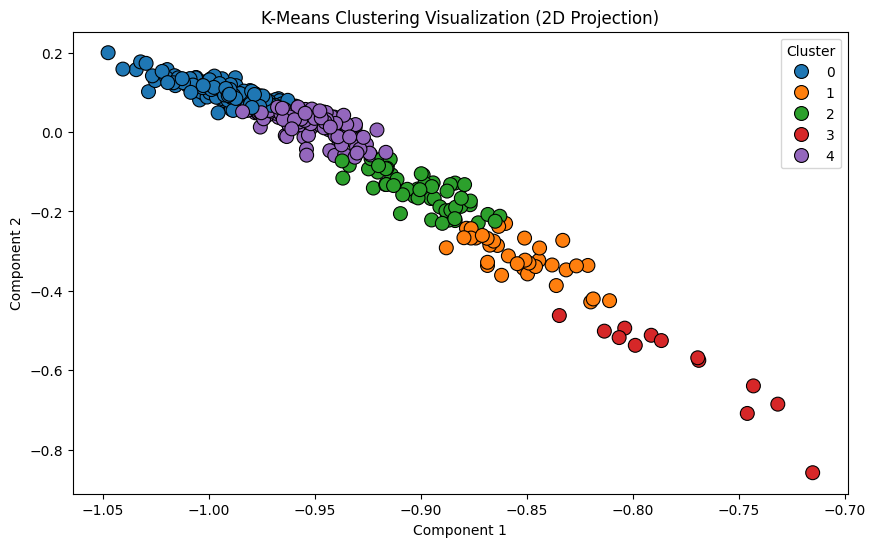

2025-03-09 15:16:53,924 : INFO : collecting all words and their counts
2025-03-09 15:16:53,925 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:16:53,926 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:16:53,929 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:16:53,932 : INFO : Creating a fresh vocabulary
2025-03-09 15:16:53,938 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:16:53.938069', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:16:53,946 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:16:53 

Finished executing at: 2025-03-09 15:16:53 

Executed at: 2025-03-09 15:16:53 



2025-03-09 15:16:54,111 : INFO : EPOCH 9: training on 24723 raw words (4721 effective words) took 0.0s, 537002 effective words/s
2025-03-09 15:16:54,126 : INFO : EPOCH 10: training on 24723 raw words (4704 effective words) took 0.0s, 506171 effective words/s
2025-03-09 15:16:54,141 : INFO : EPOCH 11: training on 24723 raw words (4638 effective words) took 0.0s, 1122432 effective words/s
2025-03-09 15:16:54,154 : INFO : EPOCH 12: training on 24723 raw words (4590 effective words) took 0.0s, 1105385 effective words/s
2025-03-09 15:16:54,169 : INFO : EPOCH 13: training on 24723 raw words (4669 effective words) took 0.0s, 1575608 effective words/s
2025-03-09 15:16:54,185 : INFO : EPOCH 14: training on 24723 raw words (4675 effective words) took 0.0s, 542753 effective words/s
2025-03-09 15:16:54,200 : INFO : EPOCH 15: training on 24723 raw words (4722 effective words) took 0.0s, 1246733 effective words/s
2025-03-09 15:16:54,214 : INFO : EPOCH 16: training on 24723 raw words (4702 effective 

sg=0, Vector_Size=200, Window=11, Epoch=50
Finished displaying at: 2025-03-09 15:16:54 

Executing 5 start time: 2025-03-09 15:16:54
K=5: Silhouette Score and WSS=0.2048	5.2139

Cluster 0:
- Former SC judge Sheikh Azmat Saeed’s funeral to be held today
- US Attorney General Pam Bondi files lawsuit against New York's immigration law
- Arab nations band together against Trump's Gaza plan
- Europe warns Trump against Ukraine deal ‘behind our backs’
- In a first, new SC judges to take oath outdoors

Cluster 1:
- Over 16,000 School Teacher Jobs 2025 – Here’s all you need to know
- Israeli military killed 85 journalists in 2024: CPJ
- Journalist killings reach record high in 2024
- Champions Trophy 2025 Prize Money Breakdown in Pakistani rupee for 2025
- From The Past Pages Of Dawn: 1975: Fifty Years Ago: Secret deal denounced

Cluster 2:
- State Bank of Pakistan’s liquid foreign reserves fall by $252 million
- MoITT sets up 43 software tech parks
- Drake and PARTYNEXTDOOR drop $ome $exy $on

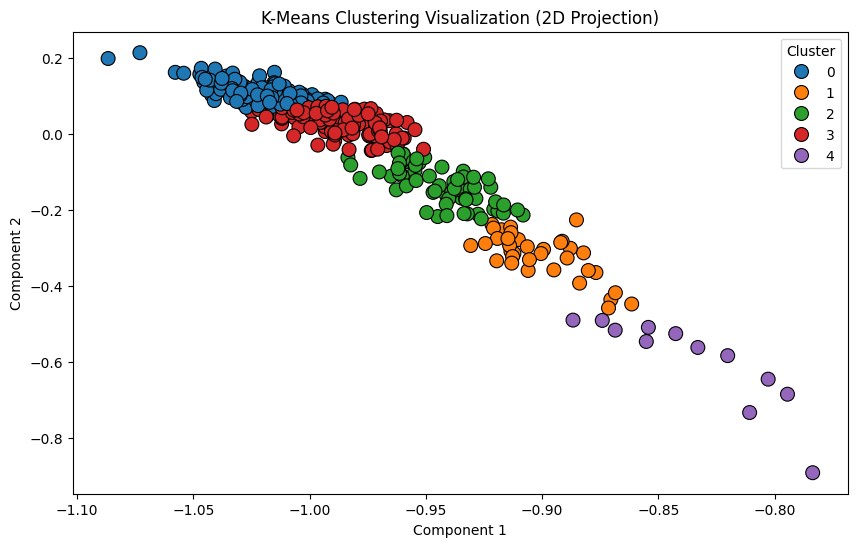

2025-03-09 15:16:55,055 : INFO : collecting all words and their counts
2025-03-09 15:16:55,056 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:16:55,057 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:16:55,061 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:16:55,062 : INFO : Creating a fresh vocabulary
2025-03-09 15:16:55,064 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:16:55.064612', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:16:55,066 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:16:55 

Finished executing at: 2025-03-09 15:16:55 

Executed at: 2025-03-09 15:16:55 



2025-03-09 15:16:55,234 : INFO : EPOCH 10: training on 24723 raw words (4796 effective words) took 0.0s, 632935 effective words/s
2025-03-09 15:16:55,250 : INFO : EPOCH 11: training on 24723 raw words (4664 effective words) took 0.0s, 896889 effective words/s
2025-03-09 15:16:55,264 : INFO : EPOCH 12: training on 24723 raw words (4734 effective words) took 0.0s, 1048226 effective words/s
2025-03-09 15:16:55,277 : INFO : EPOCH 13: training on 24723 raw words (4734 effective words) took 0.0s, 583465 effective words/s
2025-03-09 15:16:55,290 : INFO : EPOCH 14: training on 24723 raw words (4589 effective words) took 0.0s, 638390 effective words/s
2025-03-09 15:16:55,302 : INFO : EPOCH 15: training on 24723 raw words (4690 effective words) took 0.0s, 978123 effective words/s
2025-03-09 15:16:55,317 : INFO : EPOCH 16: training on 24723 raw words (4604 effective words) took 0.0s, 545950 effective words/s
2025-03-09 15:16:55,329 : INFO : EPOCH 17: training on 24723 raw words (4712 effective wo

sg=0, Vector_Size=200, Window=12, Epoch=50
Finished displaying at: 2025-03-09 15:16:55 

Executing 5 start time: 2025-03-09 15:16:55
K=5: Silhouette Score and WSS=0.2564	4.5821

Cluster 0:
- South Green book berth in Rangers Cup Basketball final
- Afghan asylum seeker arrested after car ramming attack wounds 28 in Germany
- Turkish President Erdogan reaches PM House for talks with Shehbaz Sharif
- Azaan Sami Khan pens birthday note for daughter
- JUI-F chief stands with journalists against PECA law

Cluster 1:
- State Bank of Pakistan’s liquid foreign reserves fall by $252 million
- India seen seeking global bids this year for 114 fighters
- ICC announces prize money for 2025 Champions Trophy
- SBP injects over Rs 1.9 trillion in market
- SBP reserves fall $500m in less than a month | Dawn News English

Cluster 2:
- Karachi police unveil traffic and parking plan for tri-series, Champions Trophy
- Hamas vows to uphold truce, plans to proceed with hostage-prisoner swap
- Senate Dy Chairm

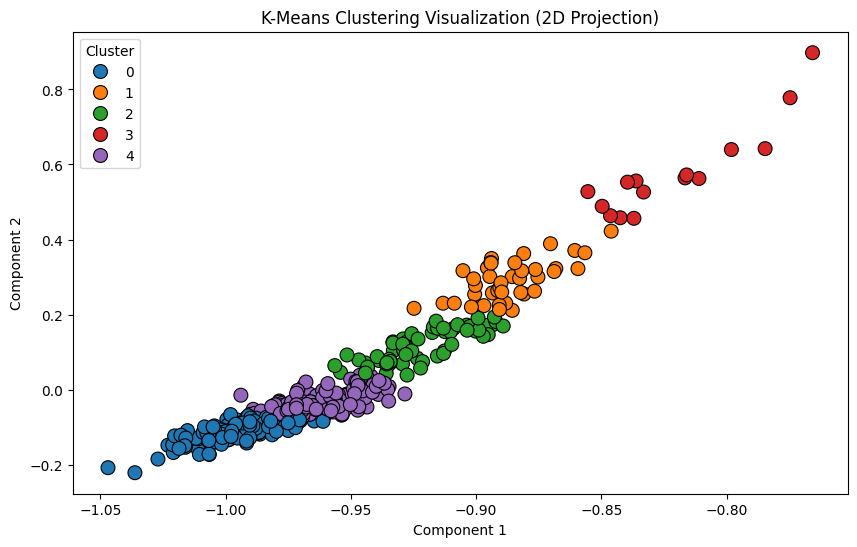

Finished displaying at: 2025-03-09 15:16:56 

Finished executing at: 2025-03-09 15:16:56 



In [285]:
best_combination, best_Sil, best_WSS = run_combinations(5, best_combination, best_Sil, best_WSS)

2025-03-09 15:16:56,233 : INFO : collecting all words and their counts
2025-03-09 15:16:56,234 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:16:56,235 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:16:56,240 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:16:56,241 : INFO : Creating a fresh vocabulary
2025-03-09 15:16:56,243 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:16:56.243678', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:16:56,244 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:16:56 



2025-03-09 15:16:56,407 : INFO : EPOCH 10: training on 24723 raw words (4654 effective words) took 0.0s, 887880 effective words/s
2025-03-09 15:16:56,422 : INFO : EPOCH 11: training on 24723 raw words (4744 effective words) took 0.0s, 567254 effective words/s
2025-03-09 15:16:56,435 : INFO : EPOCH 12: training on 24723 raw words (4614 effective words) took 0.0s, 1125476 effective words/s
2025-03-09 15:16:56,449 : INFO : EPOCH 13: training on 24723 raw words (4775 effective words) took 0.0s, 1028341 effective words/s
2025-03-09 15:16:56,463 : INFO : EPOCH 14: training on 24723 raw words (4703 effective words) took 0.0s, 634751 effective words/s
2025-03-09 15:16:56,476 : INFO : EPOCH 15: training on 24723 raw words (4854 effective words) took 0.0s, 1513045 effective words/s
2025-03-09 15:16:56,490 : INFO : EPOCH 16: training on 24723 raw words (4671 effective words) took 0.0s, 642486 effective words/s
2025-03-09 15:16:56,503 : INFO : EPOCH 17: training on 24723 raw words (4660 effective 

sg=0, Vector_Size=200, Window=8, Epoch=50
Finished displaying at: 2025-03-09 15:16:56 

Executing 9 start time: 2025-03-09 15:16:56
K=9: Silhouette Score and WSS=0.1600	4.4506

Cluster 0:
- Australia thrashed as Sri Lanka sweep ODI series
- Aurangzeb highlights increasing risks facing insurance industry
- Workshop stresses for shaping equitable, sustainable food systems
- Economic indicators showing positive trends, says Khurram Schehzad
- PM thanks President Erdogan for visiting Pakistan

Cluster 1:
- Wasim Akram joins Meer Group to drive Global Impact Vision 2030
- Page World Economy and Politics News ISB Page 5
- Togg T10X, Turkey's first national electric SUV
- Artists asked to submit their entries for exhibition till March 20
- SBP reserves fall $500m in less than a month | Dawn News English

Cluster 2:
- Lahore set to host 9th Faiz Festival 2025 from today
- Stocks remain range-bound, KSE-100 closes 361 points lower
- Second polio case of 2025 reported from Badin
- Israeli milita

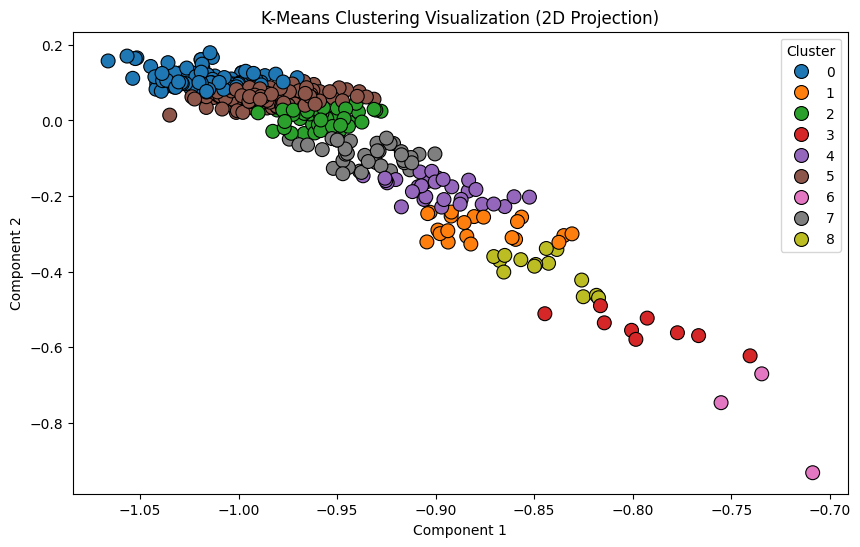

2025-03-09 15:16:57,328 : INFO : collecting all words and their counts
2025-03-09 15:16:57,330 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:16:57,332 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:16:57,337 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:16:57,338 : INFO : Creating a fresh vocabulary
2025-03-09 15:16:57,339 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:16:57.339534', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:16:57,340 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:16:57 

Finished executing at: 2025-03-09 15:16:57 

Executed at: 2025-03-09 15:16:57 



2025-03-09 15:16:57,547 : INFO : EPOCH 8: training on 24723 raw words (4630 effective words) took 0.0s, 417031 effective words/s
2025-03-09 15:16:57,563 : INFO : EPOCH 9: training on 24723 raw words (4694 effective words) took 0.0s, 540503 effective words/s
2025-03-09 15:16:57,578 : INFO : EPOCH 10: training on 24723 raw words (4670 effective words) took 0.0s, 661248 effective words/s
2025-03-09 15:16:57,594 : INFO : EPOCH 11: training on 24723 raw words (4800 effective words) took 0.0s, 519649 effective words/s
2025-03-09 15:16:57,610 : INFO : EPOCH 12: training on 24723 raw words (4767 effective words) took 0.0s, 634855 effective words/s
2025-03-09 15:16:57,627 : INFO : EPOCH 13: training on 24723 raw words (4655 effective words) took 0.0s, 484069 effective words/s
2025-03-09 15:16:57,642 : INFO : EPOCH 14: training on 24723 raw words (4635 effective words) took 0.0s, 525248 effective words/s
2025-03-09 15:16:57,657 : INFO : EPOCH 15: training on 24723 raw words (4762 effective words

sg=0, Vector_Size=200, Window=9, Epoch=50
Finished displaying at: 2025-03-09 15:16:58 

Executing 9 start time: 2025-03-09 15:16:58
K=9: Silhouette Score and WSS=0.1737	4.0316

Cluster 0:
- Hasan Raheem softens down his song 'Obvious'
- Pakistan, Turkiye sign multiple agreements to strengthen bilateral ties
- Adani to restore full power to Bangladesh in days but differences remain, say sources
- Turkish President Erdogan reaches PM House for talks with Shehbaz Sharif
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC

Cluster 1:
- Trump says US has approved extradition of suspect in 2008 Mumbai attacks
- BISE Rawalpindi 10th Class Roll Number Slips 2025 for private students update
- India expects $200 million missile deal with Philippines this year, sources say
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- PSX witnesses bearish trend, loses 360 points

Cluster 2:
- Sri Lanka shares end higher; central bank sees inflation peak above target in 

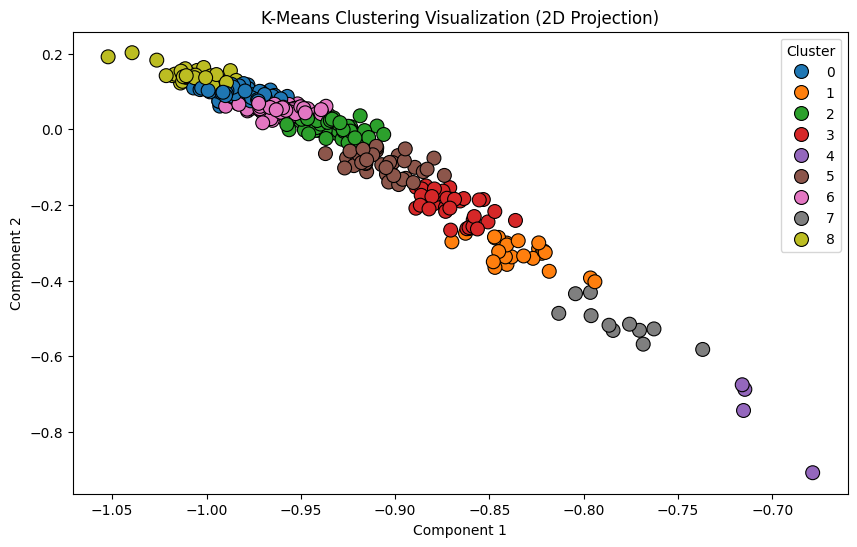

2025-03-09 15:16:58,553 : INFO : collecting all words and their counts
2025-03-09 15:16:58,555 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:16:58,556 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:16:58,560 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:16:58,561 : INFO : Creating a fresh vocabulary
2025-03-09 15:16:58,564 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:16:58.564540', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:16:58,567 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:16:58 

Finished executing at: 2025-03-09 15:16:58 

Executed at: 2025-03-09 15:16:58 



2025-03-09 15:16:58,739 : INFO : EPOCH 9: training on 24723 raw words (4745 effective words) took 0.0s, 613715 effective words/s
2025-03-09 15:16:58,753 : INFO : EPOCH 10: training on 24723 raw words (4698 effective words) took 0.0s, 626475 effective words/s
2025-03-09 15:16:58,768 : INFO : EPOCH 11: training on 24723 raw words (4642 effective words) took 0.0s, 645027 effective words/s
2025-03-09 15:16:58,784 : INFO : EPOCH 12: training on 24723 raw words (4726 effective words) took 0.0s, 538477 effective words/s
2025-03-09 15:16:58,801 : INFO : EPOCH 13: training on 24723 raw words (4643 effective words) took 0.0s, 513146 effective words/s
2025-03-09 15:16:58,817 : INFO : EPOCH 14: training on 24723 raw words (4688 effective words) took 0.0s, 503842 effective words/s
2025-03-09 15:16:58,839 : INFO : EPOCH 15: training on 24723 raw words (4659 effective words) took 0.0s, 330745 effective words/s
2025-03-09 15:16:58,855 : INFO : EPOCH 16: training on 24723 raw words (4628 effective word

sg=0, Vector_Size=200, Window=10, Epoch=50
Finished displaying at: 2025-03-09 15:16:59 

Executing 9 start time: 2025-03-09 15:16:59
K=9: Silhouette Score and WSS=0.1754	3.7016

Cluster 0:
- UEFA Champions League playoffs: Bayern, Benfica in ideal position
- Emirati ambassador to Washington says ‘no alternative’ to Trump's Gaza plan
- We will never allow Fitna al-Khawarij to impose their outdated ideology on country: COAS
- Bureaucrats will also have to declare their assets
- From Aztec Ritual to Valentine’s Day Staple: The Rise of Chocolate Gifts

Cluster 1:
- Trump says US has approved extradition of suspect in 2008 Mumbai attacks
- Honda City updated five-year installment plan in Pakistan for Feb 2025
- SBP reserves fall $500m in less than a month | Dawn News English
- Trail Blazers vs Nuggets 121-132: Jamal Murray has career night for Denver
- India expects $200 million missile deal with Philippines this year, sources say

Cluster 2:
- IGP pays tributes to police martyrs of Faisal 

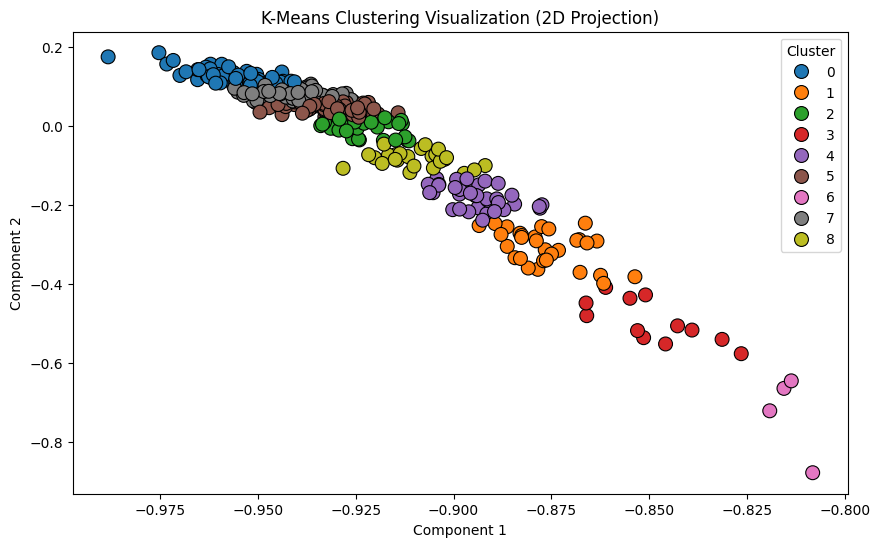

2025-03-09 15:16:59,916 : INFO : collecting all words and their counts
2025-03-09 15:16:59,918 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:16:59,918 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:16:59,924 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:16:59,925 : INFO : Creating a fresh vocabulary
2025-03-09 15:16:59,926 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:16:59.926169', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:16:59,927 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:16:59 

Finished executing at: 2025-03-09 15:16:59 

Executed at: 2025-03-09 15:16:59 



2025-03-09 15:17:00,114 : INFO : EPOCH 12: training on 24723 raw words (4669 effective words) took 0.0s, 1108473 effective words/s
2025-03-09 15:17:00,128 : INFO : EPOCH 13: training on 24723 raw words (4572 effective words) took 0.0s, 1218355 effective words/s
2025-03-09 15:17:00,141 : INFO : EPOCH 14: training on 24723 raw words (4516 effective words) took 0.0s, 1027695 effective words/s
2025-03-09 15:17:00,154 : INFO : EPOCH 15: training on 24723 raw words (4647 effective words) took 0.0s, 672815 effective words/s
2025-03-09 15:17:00,167 : INFO : EPOCH 16: training on 24723 raw words (4697 effective words) took 0.0s, 651221 effective words/s
2025-03-09 15:17:00,181 : INFO : EPOCH 17: training on 24723 raw words (4599 effective words) took 0.0s, 671240 effective words/s
2025-03-09 15:17:00,196 : INFO : EPOCH 18: training on 24723 raw words (4694 effective words) took 0.0s, 520676 effective words/s
2025-03-09 15:17:00,209 : INFO : EPOCH 19: training on 24723 raw words (4734 effective 

sg=0, Vector_Size=200, Window=11, Epoch=50
Finished displaying at: 2025-03-09 15:17:00 

Executing 9 start time: 2025-03-09 15:17:00
K=9: Silhouette Score and WSS=0.1852	3.9455

Cluster 0:
- Rihanna sends emotional message to kids amid A$AP Rocky’s shooting trial
- Punjab law minister blames ‘complacent’ law officers for court summons to secretaries
- First Lady of Turkiye visits Maarif International School in Islamabad
- Alligators, raccoons, and more thrive in urban sewer systems
- Field of education: Pakistan, Kazakhstan for enhancing mutual cooperation

Cluster 1:
- AsiaPak, Montage Oil bid for 75% of Lotte Chemical
- Top global funds turn to Pakistan as 84% stock rally set to continue: Bloomberg
- May 9 crossed all limits, says CB judge
- Page World Economy and Politics News Page 5
- Ralph Macchio reveals the key to his 38-year marriage and Cobra Kai legacy

Cluster 2:
- Over 16,000 School Teacher Jobs 2025 – Here’s all you need to know
- Israeli military killed 85 journalists in 

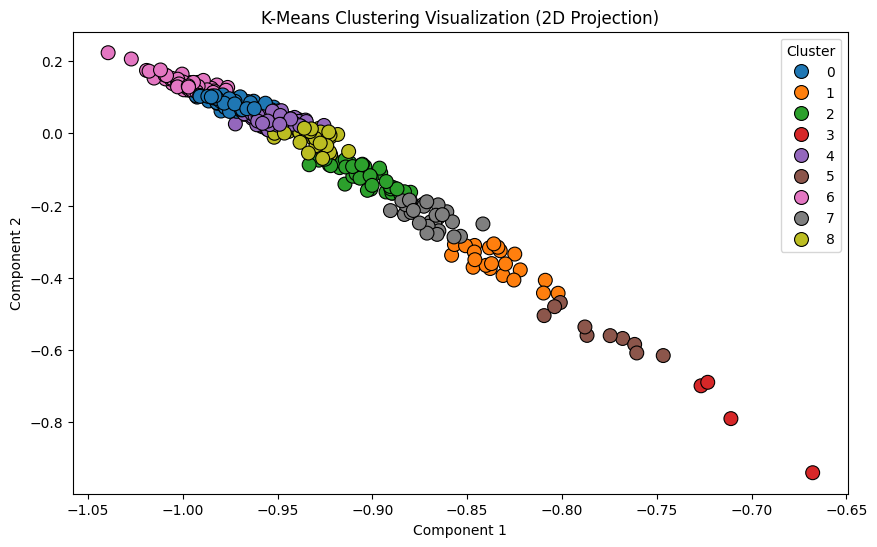

2025-03-09 15:17:01,094 : INFO : collecting all words and their counts
2025-03-09 15:17:01,095 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:17:01,097 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:17:01,103 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:17:01,105 : INFO : Creating a fresh vocabulary
2025-03-09 15:17:01,107 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:17:01.107318', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:17:01,109 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:17:01 

Finished executing at: 2025-03-09 15:17:01 

Executed at: 2025-03-09 15:17:01 



2025-03-09 15:17:01,309 : INFO : EPOCH 11: training on 24723 raw words (4738 effective words) took 0.0s, 468501 effective words/s
2025-03-09 15:17:01,325 : INFO : EPOCH 12: training on 24723 raw words (4681 effective words) took 0.0s, 962575 effective words/s
2025-03-09 15:17:01,340 : INFO : EPOCH 13: training on 24723 raw words (4641 effective words) took 0.0s, 545070 effective words/s
2025-03-09 15:17:01,355 : INFO : EPOCH 14: training on 24723 raw words (4644 effective words) took 0.0s, 894643 effective words/s
2025-03-09 15:17:01,369 : INFO : EPOCH 15: training on 24723 raw words (4769 effective words) took 0.0s, 564780 effective words/s
2025-03-09 15:17:01,386 : INFO : EPOCH 16: training on 24723 raw words (4733 effective words) took 0.0s, 1021386 effective words/s
2025-03-09 15:17:01,400 : INFO : EPOCH 17: training on 24723 raw words (4646 effective words) took 0.0s, 579504 effective words/s
2025-03-09 15:17:01,414 : INFO : EPOCH 18: training on 24723 raw words (4710 effective wo

sg=0, Vector_Size=200, Window=12, Epoch=50
Finished displaying at: 2025-03-09 15:17:01 

Executing 9 start time: 2025-03-09 15:17:01
K=9: Silhouette Score and WSS=0.1948	3.6603

Cluster 0:
- Key takeaways ahead of Pakistan's tri-series final against New Zealand
- Senate pays rich tributes to Prince Karim Aga Khan
- Saudi Arabia to host Arab summit on Trump’s Gaza plan
- SBP grants FPT clearance to Zia Ijaz as Askari Bank President & CEO
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC

Cluster 1:
- Pakistan set 243-run target for New Zealand in Tri-Nation series final
- Man shoots himself dead after killing 4 children in Swabi: officials
- MrBeast’s Beast Games winner: Who took home the $10M prize?
- Star Grammar School among 69 buildings sealed in Lahore
- Blast at coal mine in Harnai claims 9 lives, leaves 6 injured

Cluster 2:
- UAE is offering 10-Year Visa; Guide for Pakistanis to apply in 2025
- Israeli military killed 85 journalists in 2024: CPJ
- Second polio ca

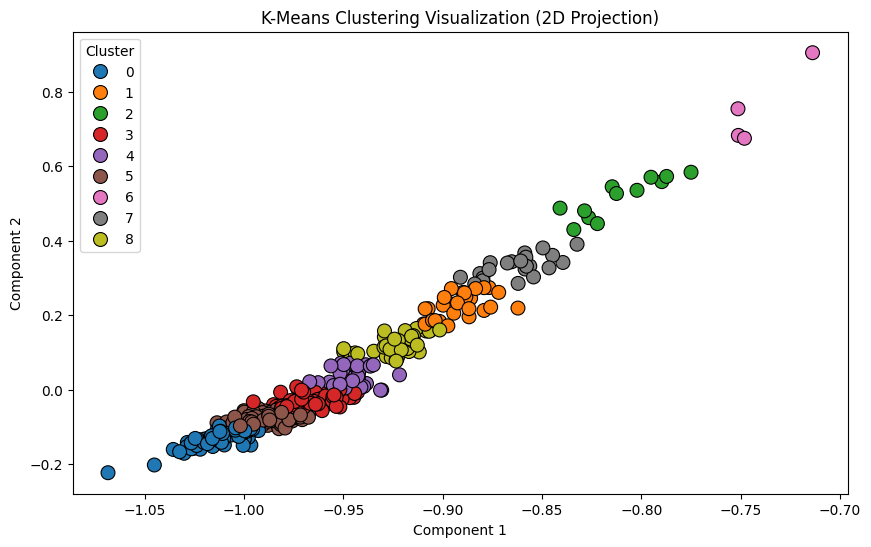

Finished displaying at: 2025-03-09 15:17:02 

Finished executing at: 2025-03-09 15:17:02 



In [286]:
best_combination, best_Sil, best_WSS = run_combinations(9, best_combination, best_Sil, best_WSS)

2025-03-09 15:17:02,317 : INFO : collecting all words and their counts
2025-03-09 15:17:02,319 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:17:02,320 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:17:02,328 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:17:02,330 : INFO : Creating a fresh vocabulary
2025-03-09 15:17:02,332 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:17:02.332118', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:17:02,335 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:17:02 



2025-03-09 15:17:02,489 : INFO : EPOCH 10: training on 24723 raw words (4654 effective words) took 0.0s, 1112226 effective words/s
2025-03-09 15:17:02,503 : INFO : EPOCH 11: training on 24723 raw words (4744 effective words) took 0.0s, 599846 effective words/s
2025-03-09 15:17:02,516 : INFO : EPOCH 12: training on 24723 raw words (4614 effective words) took 0.0s, 651658 effective words/s
2025-03-09 15:17:02,530 : INFO : EPOCH 13: training on 24723 raw words (4775 effective words) took 0.0s, 1005073 effective words/s
2025-03-09 15:17:02,543 : INFO : EPOCH 14: training on 24723 raw words (4703 effective words) took 0.0s, 1265200 effective words/s
2025-03-09 15:17:02,557 : INFO : EPOCH 15: training on 24723 raw words (4854 effective words) took 0.0s, 672420 effective words/s
2025-03-09 15:17:02,571 : INFO : EPOCH 16: training on 24723 raw words (4671 effective words) took 0.0s, 557878 effective words/s
2025-03-09 15:17:02,584 : INFO : EPOCH 17: training on 24723 raw words (4660 effective 

sg=0, Vector_Size=200, Window=8, Epoch=50
Finished displaying at: 2025-03-09 15:17:03 

Executing 13 start time: 2025-03-09 15:17:03
K=13: Silhouette Score and WSS=0.1698	3.2988

Cluster 0:
- PARTLY FACETIOUS: Our stakeholders know everything about everything
- Mohsin Naqvi announces three-day spring festival in Islamabad
- Pakistan on new journey towards stability, prosperity, says Rana Mashhood
- I want to become a UFC World Champion, Bano Butt on her dreams and breaking barriers
- Aurangzeb highlights increasing risks facing insurance industry

Cluster 1:
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- IMF’s 2024 Article IV report, and debate on inflation—I
- More than 500 million take ‘holy dip’ in India’s Maha Kumbh festival
- Pakistan CPI 2024 – deep-rooted corruption persists
- India expects $200 million missile deal with Philippines this year, sources say

Cluster 2:
- China’s Tencent wins video copyright infringment case in US district court
- Seve

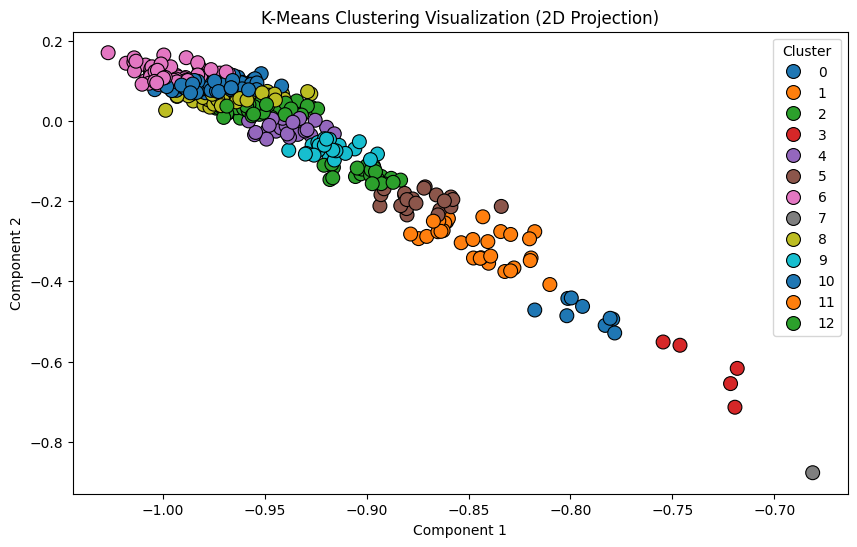

2025-03-09 15:17:03,701 : INFO : collecting all words and their counts
2025-03-09 15:17:03,702 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:17:03,703 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:17:03,706 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:17:03,707 : INFO : Creating a fresh vocabulary
2025-03-09 15:17:03,708 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:17:03.708524', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:17:03,709 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:17:03 

Finished executing at: 2025-03-09 15:17:03 

Executed at: 2025-03-09 15:17:03 



2025-03-09 15:17:03,905 : INFO : EPOCH 15: training on 24723 raw words (4655 effective words) took 0.0s, 513247 effective words/s
2025-03-09 15:17:03,918 : INFO : EPOCH 16: training on 24723 raw words (4627 effective words) took 0.0s, 652425 effective words/s
2025-03-09 15:17:03,929 : INFO : EPOCH 17: training on 24723 raw words (4687 effective words) took 0.0s, 771269 effective words/s
2025-03-09 15:17:03,942 : INFO : EPOCH 18: training on 24723 raw words (4673 effective words) took 0.0s, 655538 effective words/s
2025-03-09 15:17:03,952 : INFO : EPOCH 19: training on 24723 raw words (4616 effective words) took 0.0s, 1394393 effective words/s
2025-03-09 15:17:03,964 : INFO : EPOCH 20: training on 24723 raw words (4595 effective words) took 0.0s, 1276708 effective words/s
2025-03-09 15:17:03,976 : INFO : EPOCH 21: training on 24723 raw words (4626 effective words) took 0.0s, 725488 effective words/s
2025-03-09 15:17:03,988 : INFO : EPOCH 22: training on 24723 raw words (4645 effective w

sg=0, Vector_Size=200, Window=9, Epoch=50
Finished displaying at: 2025-03-09 15:17:04 

Executing 13 start time: 2025-03-09 15:17:04
K=13: Silhouette Score and WSS=0.1779	3.2559

Cluster 0:
- PlayStation state of play returns with new games, trailers, and updates
- Trump launches ‘reciprocal tariffs’ for allies, rivals
- Paramount channels, including CBS and Nickelodeon, to go dark on YouTube TV
- Workshop stresses for shaping equitable, sustainable food systems
- Basketball star Jahki Howard caught sliding into DMs of trans influencer

Cluster 1:
- Excellence Over Perfection: Highlights from the ADA Awards 2025
- KSE-100 closes 479 points lower as late-session selling erases intra-day gains
- IMF’s 2024 Article IV report, and debate on inflation—I
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- Pakistan CPI 2024 – deep-rooted corruption persists

Cluster 2:
- Artists asked to submit their entries for exhibition till March 20
- Sri Lanka shares end higher; 

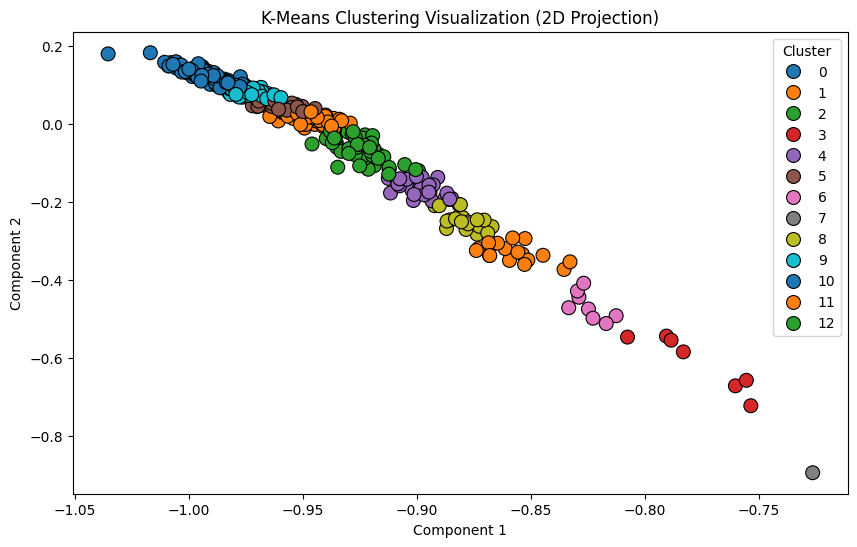

2025-03-09 15:17:04,764 : INFO : collecting all words and their counts
2025-03-09 15:17:04,764 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:17:04,766 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:17:04,773 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:17:04,773 : INFO : Creating a fresh vocabulary
2025-03-09 15:17:04,774 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:17:04.774926', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:17:04,776 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:17:04 

Finished executing at: 2025-03-09 15:17:04 

Executed at: 2025-03-09 15:17:04 



2025-03-09 15:17:04,962 : INFO : EPOCH 10: training on 24723 raw words (4712 effective words) took 0.0s, 604863 effective words/s
2025-03-09 15:17:04,998 : INFO : EPOCH 11: training on 24723 raw words (4733 effective words) took 0.0s, 204687 effective words/s
2025-03-09 15:17:05,038 : INFO : EPOCH 12: training on 24723 raw words (4650 effective words) took 0.0s, 227132 effective words/s
2025-03-09 15:17:05,065 : INFO : EPOCH 13: training on 24723 raw words (4633 effective words) took 0.0s, 278744 effective words/s
2025-03-09 15:17:05,089 : INFO : EPOCH 14: training on 24723 raw words (4698 effective words) took 0.0s, 423487 effective words/s
2025-03-09 15:17:05,126 : INFO : EPOCH 15: training on 24723 raw words (4721 effective words) took 0.0s, 171359 effective words/s
2025-03-09 15:17:05,145 : INFO : EPOCH 16: training on 24723 raw words (4719 effective words) took 0.0s, 500822 effective words/s
2025-03-09 15:17:05,166 : INFO : EPOCH 17: training on 24723 raw words (4639 effective wor

sg=0, Vector_Size=200, Window=10, Epoch=50
Finished displaying at: 2025-03-09 15:17:05 

Executing 13 start time: 2025-03-09 15:17:05
K=13: Silhouette Score and WSS=0.1621	3.3582

Cluster 0:
- ‘England can be dangerous in Champions Trophy despite India loss’, says Butler
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- Lizzo teases ‘End of an era’ with cryptic Instagram post months after sexual abuse scandal
- In a first, new SC judges to take oath outdoors
- Britain announces new sanctions against Putin allies

Cluster 1:
- 26 Year-Old TikToker Bailey Hutchins Tragically Passes Away After 2 Year Battle With Colon Cancer
- Rs10bn defamation suit: LHC seeks more arguments on IK’s plea
- Sri Lanka hammer Australia in record 174-run rout
- Key banks implicated in Rs117bn over-invoicing scandal linked to solar panel imports
- Tri-series final: Pakistan set 243-run target for New Zealand

Cluster 2:
- Feb 14 last date to submit third installment for Hajj 2025
- Over 16,000 

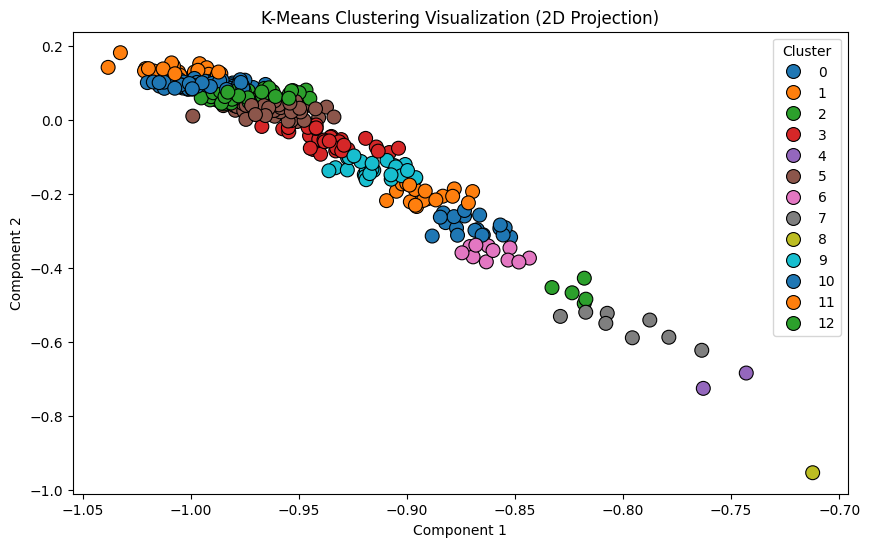

2025-03-09 15:17:06,156 : INFO : collecting all words and their counts
2025-03-09 15:17:06,157 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:17:06,158 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:17:06,164 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:17:06,165 : INFO : Creating a fresh vocabulary
2025-03-09 15:17:06,167 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:17:06.167929', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:17:06,169 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:17:06 

Finished executing at: 2025-03-09 15:17:06 

Executed at: 2025-03-09 15:17:06 



2025-03-09 15:17:06,357 : INFO : EPOCH 11: training on 24723 raw words (4644 effective words) took 0.0s, 592460 effective words/s
2025-03-09 15:17:06,374 : INFO : EPOCH 12: training on 24723 raw words (4684 effective words) took 0.0s, 596118 effective words/s
2025-03-09 15:17:06,388 : INFO : EPOCH 13: training on 24723 raw words (4686 effective words) took 0.0s, 859706 effective words/s
2025-03-09 15:17:06,403 : INFO : EPOCH 14: training on 24723 raw words (4766 effective words) took 0.0s, 727289 effective words/s
2025-03-09 15:17:06,421 : INFO : EPOCH 15: training on 24723 raw words (4702 effective words) took 0.0s, 427750 effective words/s
2025-03-09 15:17:06,434 : INFO : EPOCH 16: training on 24723 raw words (4761 effective words) took 0.0s, 1103105 effective words/s
2025-03-09 15:17:06,449 : INFO : EPOCH 17: training on 24723 raw words (4641 effective words) took 0.0s, 1049786 effective words/s
2025-03-09 15:17:06,463 : INFO : EPOCH 18: training on 24723 raw words (4705 effective w

sg=0, Vector_Size=200, Window=11, Epoch=50
Finished displaying at: 2025-03-09 15:17:07 

Executing 13 start time: 2025-03-09 15:17:07
K=13: Silhouette Score and WSS=0.1402	3.3213

Cluster 0:
- Govt has no plan to impose new taxes: NA told
- JD Vance says US wields economic, military leverage on Russia in Ukraine talks
- IK urges army chief to revisit policies in ‘best national interest’
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice
- Lizzo teases ‘End of an era’ with cryptic Instagram post months after sexual abuse scandal

Cluster 1:
- Deadly blast in Harnai kills 11 coal miners, injures four
- SBP reserves fall $500m in less than a month | Dawn News English
- Druski roasted by NBA fans for bold 2025 All-Star game stat predictions and lack of defense
- India expects $200 million missile deal with Philippines this year, sources say
- Railways to restore Shah Hussain Express from 25th

Cluster 2:
- Hamas vows to uphold truce, plans to proceed with hos

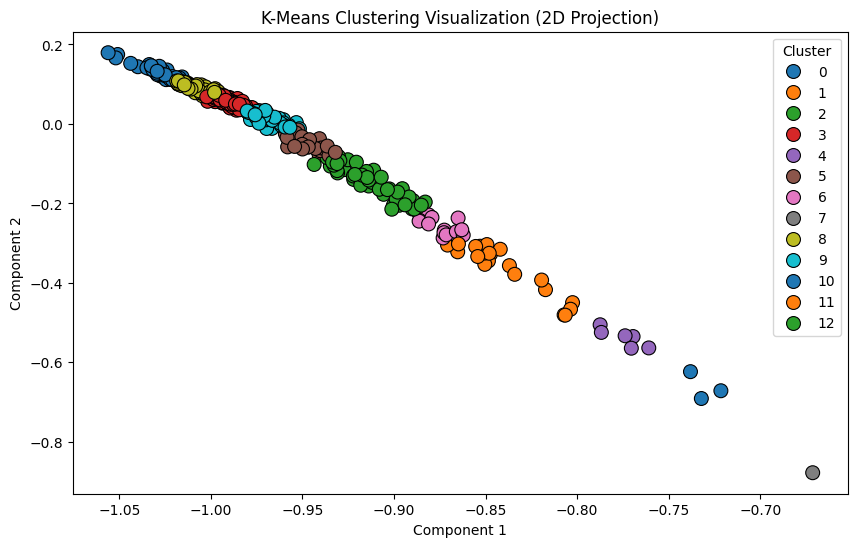

2025-03-09 15:17:07,550 : INFO : collecting all words and their counts
2025-03-09 15:17:07,551 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:17:07,553 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:17:07,556 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:17:07,558 : INFO : Creating a fresh vocabulary
2025-03-09 15:17:07,559 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:17:07.559411', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:17:07,561 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:17:07 

Finished executing at: 2025-03-09 15:17:07 

Executed at: 2025-03-09 15:17:07 



2025-03-09 15:17:07,754 : INFO : EPOCH 11: training on 24723 raw words (4750 effective words) took 0.0s, 551383 effective words/s
2025-03-09 15:17:07,782 : INFO : EPOCH 12: training on 24723 raw words (4537 effective words) took 0.0s, 409122 effective words/s
2025-03-09 15:17:07,796 : INFO : EPOCH 13: training on 24723 raw words (4794 effective words) took 0.0s, 1250293 effective words/s
2025-03-09 15:17:07,810 : INFO : EPOCH 14: training on 24723 raw words (4627 effective words) took 0.0s, 699302 effective words/s
2025-03-09 15:17:07,822 : INFO : EPOCH 15: training on 24723 raw words (4769 effective words) took 0.0s, 696967 effective words/s
2025-03-09 15:17:07,834 : INFO : EPOCH 16: training on 24723 raw words (4733 effective words) took 0.0s, 642547 effective words/s
2025-03-09 15:17:07,845 : INFO : EPOCH 17: training on 24723 raw words (4646 effective words) took 0.0s, 697399 effective words/s
2025-03-09 15:17:07,858 : INFO : EPOCH 18: training on 24723 raw words (4710 effective wo

sg=0, Vector_Size=200, Window=12, Epoch=50
Finished displaying at: 2025-03-09 15:17:08 

Executing 13 start time: 2025-03-09 15:17:08
K=13: Silhouette Score and WSS=0.1867	3.4457

Cluster 0:
- US awaits Arab plan for Gaza, Trump plan remains default option: Washington
- Bureaucrats will also have to declare their assets
- Ishaq Dar to visit USA for UNSC meeting
- Field of education: Pakistan, Kazakhstan for enhancing mutual cooperation
- Sharaa speaks of ‘strong strategic ties’ with Russia in Putin phone call

Cluster 1:
- Pakistan Air Force fighter Jets to kick off ICC Champions Trophy 2025 in Style
- SBP reserves fall $500m in less than a month | Dawn News English
- Petrol Price in Pakistan to ‘go down’ from Feb 16 amid dip in global oil rates
- The Lord of the Rings: The Rings of Power season 3 officially renewed with filming starting in 2025
- Kanye West's $250K sex tape scandal resurfaces amid Bianca Censori divorce rumors

Cluster 2:
- Thousands of patients treated at PIMS OPD in

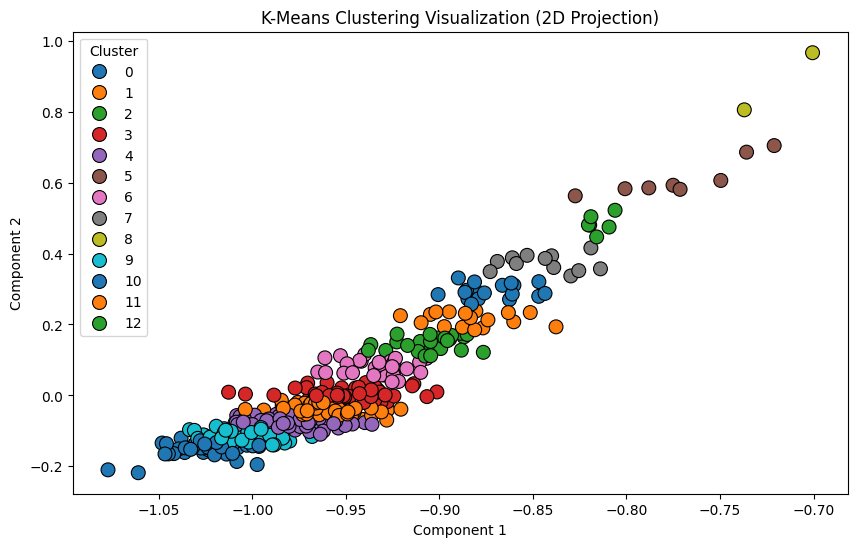

Finished displaying at: 2025-03-09 15:17:08 

Finished executing at: 2025-03-09 15:17:08 



In [287]:
best_combination, best_Sil, best_WSS = run_combinations(13, best_combination, best_Sil, best_WSS)

In [288]:
# Convert to DataFrame for easy export
results_df = pd.DataFrame(results, columns=['k', 'Vectorizer Type', 'vector_size', 'window', 'Epochs Count', 'Vectorizer Name', 'Silhouette Score', 'WSS Score'])

# Save results
results_df.to_csv("clustering_results.csv", index=False)

results_df

,k,Vectorizer Type,vector_size,window,Epochs Count,Vectorizer Name,Silhouette Score,WSS Score
0,5,Word2Vec,200,8,50,CBOW,0.259010,4.453023
1,5,Word2Vec,200,9,50,CBOW,0.210359,5.156120
2,5,Word2Vec,200,10,50,CBOW,0.244840,5.351940
3,5,Word2Vec,200,11,50,CBOW,0.204757,5.213937
4,5,Word2Vec,200,12,50,CBOW,0.256438,4.582062
5,9,Word2Vec,200,8,50,CBOW,0.160011,4.450608
6,9,Word2Vec,200,9,50,CBOW,0.173731,4.031575
7,9,Word2Vec,200,10,50,CBOW,0.175353,3.701590
8,9,Word2Vec,200,11,50,CBOW,0.185160,3.945513
9,9,Word2Vec,200,12,50,CBOW,0.194800,3.660306


In [289]:
# Convert to DataFrame for easy export
wss_scores_df = pd.DataFrame(wss_scores, columns=['k', 'Average WSS Score'])

wss_scores_df

,k,Average WSS Score
0,5,4.951416
1,9,3.957919
2,13,3.335981


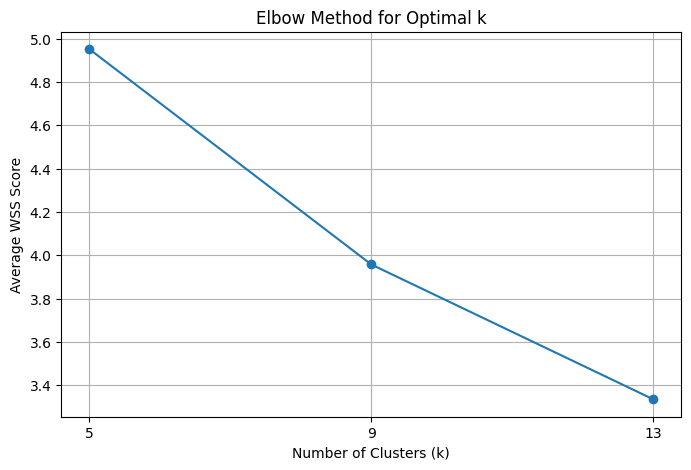

In [290]:
# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(wss_scores_df['k'], wss_scores_df['Average WSS Score'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average WSS Score")
plt.title("Elbow Method for Optimal k")
plt.xticks(wss_scores_df['k'])  # Ensure all k values are shown on x-axis
plt.grid(True)

# Show the plot
plt.show()

In [291]:
best_combination # vector size, window size, epoch

[5, 200, 8, 50, 0.2590102, 4.453023433685303]